In [5]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [7]:
#importing train dataset
data = "C:/Users/amirt/Downloads/train_data.txt"

# Read the CSV file using pandas
data_set = pd.read_csv(data, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

# Display the data
data_set


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [8]:
#importing test data
data1 = "C:/Users/amirt/Downloads/test_data.txt"
data_set1 = pd.read_csv(data1, sep=':::', names=['Id','Title','Description'], engine='python')
data_set1.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


Text(0, 0.5, 'Genre')

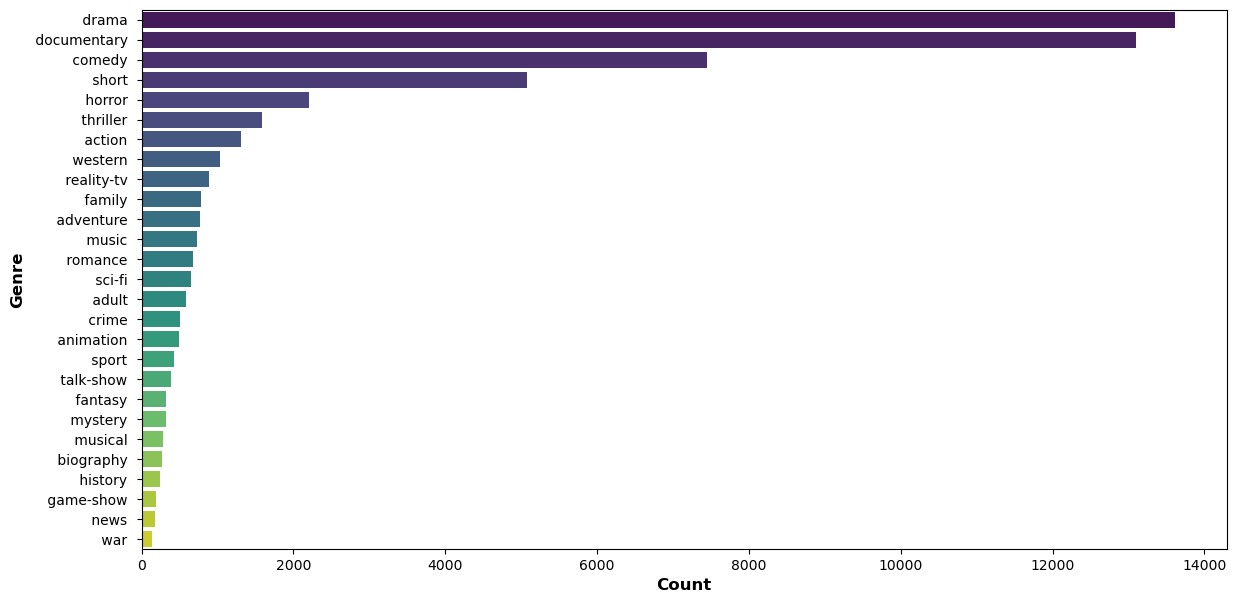

In [9]:
#Analysis of Data
plt.figure(figsize=(14,7))
sns.countplot(data=data_set, y='Genre', order=data_set['Genre'].value_counts().index, palette = 'viridis')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.ylabel('Genre',fontsize=12,fontweight='bold')

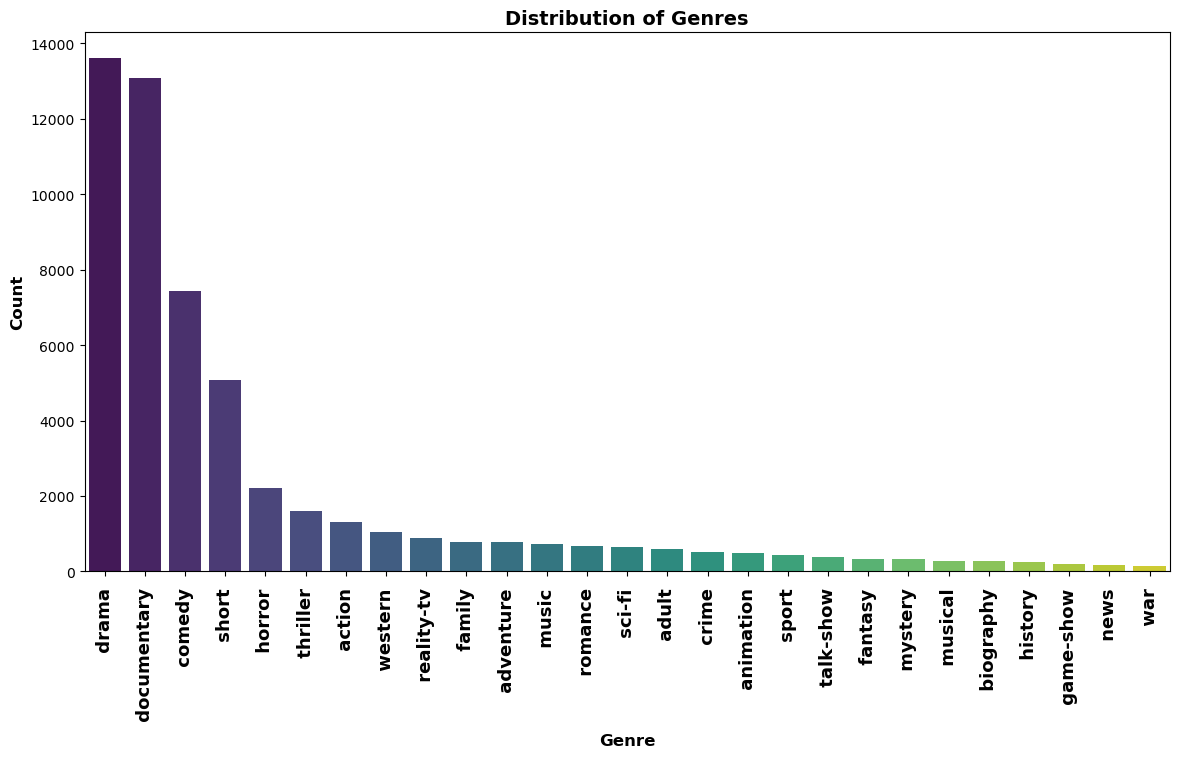

In [10]:
#distribution of genres using bar plot
plt.figure(figsize=(14,7))
counts = data_set['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Distribution of Genres',fontsize=14,fontweight='bold')
plt.xticks(rotation=90,fontsize=13, fontweight='bold')
plt.show()

In [11]:
#data cleansing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amirt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk

# Download the required resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amirt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
stemmer=LancasterStemmer()
stop_words=set(stopwords.words('english'))
def clean_text(text):
    text=text.lower()
    text=re.sub(r'@\S+','',text)
    text=re.sub(r'http\S+','',text)
    text=re.sub(r'pic.\S+','',text)
    text=re.sub(r"[^a-zA-Z+']",' ',text)
    text=re.sub(r'\s+[a-zA-Z]\s+',' ',text+' ')
    text="".join([i for i in text if i not in string.punctuation])
    words=nltk.word_tokenize(text)
    stopwords=nltk.corpus.stopwords.words('english')
    text=" ".join([i for i in words if i not in stopwords and len(i) > 2])
    text=re.sub("\s[\s]+", " ",text).strip()
    return text
data_set['Text_cleaning']=data_set['Description'].apply(clean_text)
data_set1['Text_cleaning']=data_set1['Description'].apply(clean_text)

In [14]:
#initializing the TF - IDF vectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(data_set['Text_cleaning'])
X_test = tfidf_vectorizer.transform(data_set1['Text_cleaning'])
X = X_train
y = data_set['Genre']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation_accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Validation_accuracy: 0.44526422576777647


C:\Users\amirt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amirt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\amirt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X_test_prediction = classifier.predict(X_test)
data_set1['Predicted Genre'] = X_test_prediction

In [16]:
#Prediction

data_set1.to_csv('predicted_genres.csv',index=False)
print(data_set1)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    